## 1 Import libraries

In [51]:
from rbm import RBM
from autoencoder_rbm import Autoencoder_RBM
from dbn import DeepBeliefNetwork
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 2 MNIST

In [52]:
from tensorflow.examples.tutorials.mnist import input_data

# Download the data in the working directory
mnist = input_data.read_data_sets("../data/mnist/", one_hot=True)

#training_data = {image: mnist.train.images, label: mnist.train.labels}
#validation_data = {image: mnist.validation.images, label: mnist.validation.labels}
#test_data = {image: mnist.test.images, label: mnist.test.labels}
train_dataset = mnist.train.images
train_labels = mnist.train.labels
validation_dataset = mnist.validation.images
validation_labels = mnist.validation.labels
test_dataset = mnist.test.images
test_labels = mnist.test.labels
print("The shape of the dataset for training: ", train_dataset.shape, train_labels.shape)
print("The shape of the dataset for validation: ", validation_dataset.shape, validation_labels.shape)
print("The shape of the dataset for test: ", test_dataset.shape, test_labels.shape)

Extracting ../data/mnist/train-images-idx3-ubyte.gz
Extracting ../data/mnist/train-labels-idx1-ubyte.gz
Extracting ../data/mnist/t10k-images-idx3-ubyte.gz
Extracting ../data/mnist/t10k-labels-idx1-ubyte.gz
The shape of the dataset for training:  (55000, 784) (55000, 10)
The shape of the dataset for validation:  (5000, 784) (5000, 10)
The shape of the dataset for test:  (10000, 784) (10000, 10)


In [53]:
print(np.argmax(train_labels[:21], axis=1))

[7 3 4 6 1 8 1 0 9 8 0 3 1 2 7 0 2 9 6 0 1]


In [54]:
train_set = pd.DataFrame(train_dataset)
labels_tmp = pd.DataFrame(train_labels[:10])
train_set.loc[:10, :10].loc[np.argmax(train_labels[:10],axis=1)==1,:10]

,0,1,2,3,4,5,6,7,8,9,10
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
train_set_1 = train_set.loc[np.argmax(train_labels, axis=1)==1, :]
train_labels_1 = train_labels[list(train_set_1.index.values)]
print(train_set_1.shape)
print(train_labels_1[:10])
train_set_1.head()

(6179, 784)
[[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]]


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
train_set_7 = train_set.loc[np.argmax(train_labels, axis=1)==7, :]
print(train_set_7.shape)
train_set_7.head()

(5715, 784)


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 2.0 Mix 1 and 7

In [57]:
# Choose 20 images of 7
num_abonormal = 20
batch_images_7 = train_set_7.sample(num_abonormal)
batch_labels_7 = train_labels[list(batch_images_7.index.values)]
print(batch_images_7.shape)
print(batch_labels_7)

(20, 784)
[[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]]


In [58]:
train_set_mix = pd.concat([train_set_1, batch_images_7], ignore_index=True, axis=0)
train_labels_mix = pd.concat([pd.DataFrame(train_labels_1), pd.DataFrame(batch_labels_7)], ignore_index=True, axis=0)

In [59]:
print(train_labels_mix.tail())

        0    1    2    3    4    5    6    7    8    9
6194  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
6195  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
6196  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
6197  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
6198  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0


In [60]:
# Shuffle train_set_mix and train_labels_mix in the same way
train_set_mix_total = pd.concat([train_set_mix, train_labels_mix], axis=1)
train_set_mix_total = train_set_mix_total.sample(frac=1).reset_index(drop=True)
print(train_set_mix_total.shape)

(6199, 794)


In [61]:
train_set_shuffle = train_set_mix_total.iloc[:, 0:batch_images_7.shape[1]]
train_labels_shuffle = train_set_mix_total.iloc[:, batch_images_7.shape[1]:]
print(train_set_shuffle.shape)
print(train_labels_shuffle.shape)

(6199, 784)
(6199, 10)


In [62]:
index_abnormal = train_labels_shuffle.index[np.argmax(np.array(train_labels_shuffle), axis=1)==7]
train_labels_shuffle[np.argmax(np.array(train_labels_shuffle), axis=1)==7]

,0,1,2,3,4,5,6,7,8,9
150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1718,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app


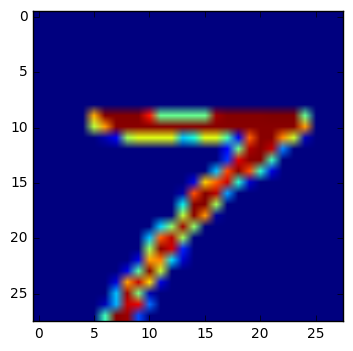

In [75]:
plt.figure()
plt.imshow(train_set_shuffle.iloc[150, :].reshape(28, 28))
plt.show()

In [64]:
def recons_error(input_set, recons):
    dif = input_set - recons
    dif = np.power(dif, 2)
    return np.mean(dif, axis=1)

In [76]:
# Test for autoencoder
autoencoder_1 = Autoencoder_RBM(
       rbm_layers=[1000, 500, 100],
       rbm_gauss_visible=True,
       finetune_num_epochs=300,
       finetune_loss_func='mse',
       do_pretrain=False,
       tied_weights=False)
compression_1, reconstruction_1, loss_summary_1 = autoencoder_1.fit(
    np.array(train_set_shuffle), validation_set=np.array(train_set_shuffle), test_set=np.array(train_set_shuffle))

Iter 1: Training set: current loss 0.168672  ||  Validation set: current loss 0.168703
Validation:  [5105 5824 4077 2499 3457 4374  142 5113 1730 4497 1017 4602 4428  307 3629
 2888 3003 1700 2039 5131 6089 4475  705 5536 2892]
Iter 2: Training set: current loss 0.168723  ||  Validation set: current loss 0.168738
Validation:  [5105 5824 4077 2499 4374 3457  142 1730 4497 5113 1017 4602 4428  307 2888
 3629 5131 1700 3003 4475 2039 6089  705 2892 4470]
Iter 3: Training set: current loss 0.168716  ||  Validation set: current loss 0.168711
Validation:  [5105 5824 4077 2499 3457 4374  142 5113 1730 4497 1017 4602 4428  307 3629
 3003 2888 2039 1700 5131 6089 5536 4475  705 2892]
Iter 4: Training set: current loss 0.168671  ||  Validation set: current loss 0.168670
Validation:  [5105 5824 4077 2499 4374 3457  142 4497 5113 1730 1017 4602 4428  307 2888
 3629 5131 3003 1700 2039 4475 6089  705 5536 4470]
Iter 5: Training set: current loss 0.168647  ||  Validation set: current loss 0.168636
V

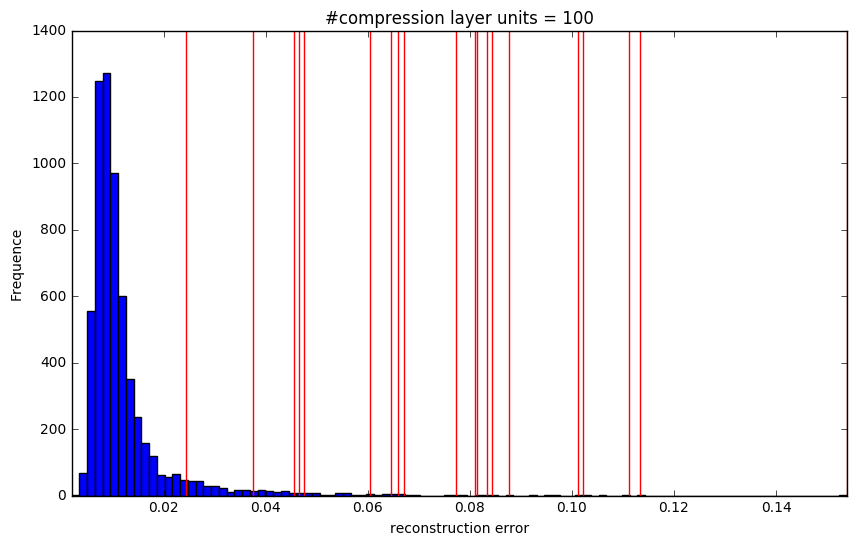

In [77]:
reconstruction_error_1 = recons_error(np.array(train_set_shuffle), reconstruction_1)
plt.figure(figsize=(10, 6))
min_bound = np.min(reconstruction_error_1) / 2.0
max_bound = np.max(reconstruction_error_1)
plot_range = max_bound - min_bound
num_bins = 100
bins = [ (min_bound + i * plot_range / num_bins) for i in range(num_bins+1)]
freq, _, _ = plt.hist(reconstruction_error_1, bins=bins)

ax = plt.axes()
for item in index_abnormal:
    ax.axvline(reconstruction_error_1[item], color='r', linestyle='-')

ax.set_xlim([min_bound, max_bound])
plt.xlabel(r'reconstruction error')
plt.ylabel(r'Frequence')
plt.title('#compression layer units = 100')
plt.savefig('mnist_compare_100units.png')
plt.show()

In [78]:
# Test for autoencoder
autoencoder_2 = Autoencoder_RBM(
       rbm_layers=[1000, 500, 10],
       rbm_gauss_visible=True,
       finetune_num_epochs=300,
       finetune_loss_func='mse',
       do_pretrain=False,
       tied_weights=False)
compression_2, reconstruction_2, loss_summary_2 = autoencoder_2.fit(
    np.array(train_set_shuffle), validation_set=np.array(train_set_shuffle), test_set=np.array(train_set_shuffle))

Iter 1: Training set: current loss 0.169898  ||  Validation set: current loss 0.169905
Validation:  [5105 5824 4077 2499 3457  142 4374 5113 4497 1730 1017 4602 4428  307 2888
 3629 5131 1700 3003 2039 4475 6089  705 5536 4470]
Iter 2: Training set: current loss 0.169823  ||  Validation set: current loss 0.169854
Validation:  [5105 5824 4077 2499 4374 3457  142 4497 1730 5113 1017 4602 4428  307 2888
 3629 5131 3003 1700 4475 2039  705 6089 4470 5536]
Iter 3: Training set: current loss 0.169958  ||  Validation set: current loss 0.169950
Validation:  [5105 5824 4077 2499 3457  142 4374 5113 4497 1730 1017 4602 4428  307 2888
 3629 3003 2039 1700 5131 4475 6089 5536  705 2892]
Iter 4: Training set: current loss 0.169989  ||  Validation set: current loss 0.169981
Validation:  [5105 5824 4077 2499 3457  142 4374 5113 1730 4497 1017 4602  307 4428 3629
 3003 2888 2039 1700 6089 5131 5536 4475 2892  705]
Iter 5: Training set: current loss 0.169865  ||  Validation set: current loss 0.169860
V

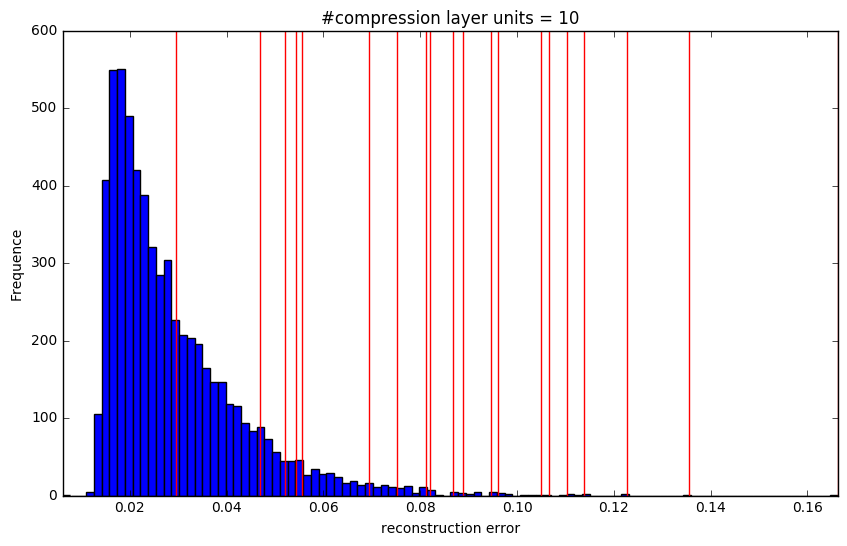

In [81]:
reconstruction_error_2 = recons_error(np.array(train_set_shuffle), reconstruction_2)
plt.figure(figsize=(10, 6))
min_bound = np.min(reconstruction_error_2) / 2.0
max_bound = np.max(reconstruction_error_2)
plot_range = max_bound - min_bound
num_bins = 100
bins = [ (min_bound + i * plot_range / num_bins) for i in range(num_bins+1)]
freq, _, _ = plt.hist(reconstruction_error_2, bins=bins)

ax = plt.axes()
for item in index_abnormal:
    ax.axvline(reconstruction_error_2[item], color='r', linestyle='-')

ax.set_xlim([min_bound, max_bound])
plt.xlabel(r'reconstruction error')
plt.ylabel(r'Frequence')
plt.title('#compression layer units = 10')
plt.savefig('mnist_compare_10units.png')
plt.show()

In [79]:
# Test for autoencoder
autoencoder_3 = Autoencoder_RBM(
       rbm_layers=[1000, 500, 4],
       rbm_gauss_visible=True,
       finetune_num_epochs=300,
       finetune_loss_func='mse',
       do_pretrain=False,
       tied_weights=False)
compression_3, reconstruction_3, loss_summary_3 = autoencoder_3.fit(
    np.array(train_set_shuffle), validation_set=np.array(train_set_shuffle), test_set=np.array(train_set_shuffle))

Iter 1: Training set: current loss 0.169839  ||  Validation set: current loss 0.169825
Validation:  [5105 5824 4077 2499 4374 3457  142 4497 5113 1730 1017 4602 4428  307 2888
 5131 3629 4475 1700 3003 2039  705 6089 4470 2892]
Iter 2: Training set: current loss 0.169944  ||  Validation set: current loss 0.169907
Validation:  [5105 5824 4077 2499 4374 3457 4497  142 1730 5113 1017 4602 4428 5131  307
 2888 4475 3629 1700  705 6089 3003 2039 4470 5359]
Iter 3: Training set: current loss 0.169816  ||  Validation set: current loss 0.169822
Validation:  [5105 5824 4077 2499 3457 4374  142 4497 5113 1730 1017 4602 4428  307 2888
 5131 3629 1700 3003 4475 2039 6089  705 4470 5536]
Iter 4: Training set: current loss 0.169980  ||  Validation set: current loss 0.169991
Validation:  [5105 5824 4077 2499 3457 4374  142 5113 1730 4497 1017 4602 4428  307 3629
 2888 3003 2039 1700 5131 6089 5536 4475 2892  705]
Iter 5: Training set: current loss 0.169814  ||  Validation set: current loss 0.169815
V

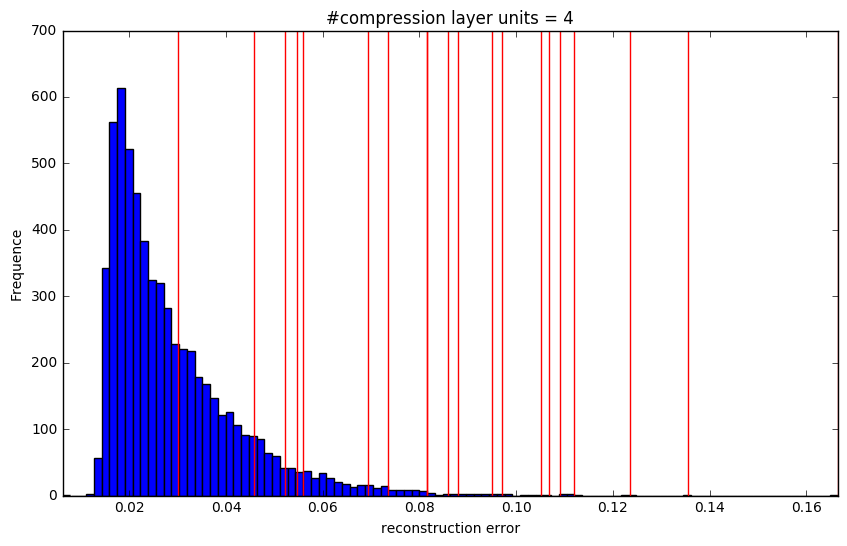

In [80]:
reconstruction_error_3 = recons_error(np.array(train_set_shuffle), reconstruction_3)
plt.figure(figsize=(10, 6))
min_bound = np.min(reconstruction_error_3) / 2.0
max_bound = np.max(reconstruction_error_3)
plot_range = max_bound - min_bound
num_bins = 100
bins = [ (min_bound + i * plot_range / num_bins) for i in range(num_bins+1)]
freq, _, _ = plt.hist(reconstruction_error_3, bins=bins)

ax = plt.axes()
for item in index_abnormal:
    ax.axvline(reconstruction_error_3[item], color='r', linestyle='-')

ax.set_xlim([min_bound, max_bound])
plt.xlabel(r'reconstruction error')
plt.ylabel(r'Frequence')
plt.title('#compression layer units = 4')
plt.savefig('mnist_compare_4units.png')
plt.show()

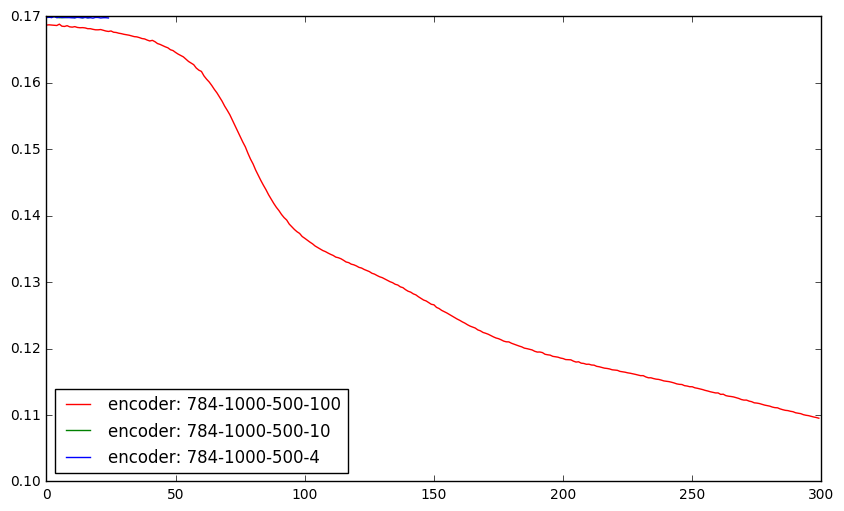

In [82]:
plt.figure(figsize=(10, 6))
plt.plot(loss_summary_1, 'r-', label='encoder: 784-1000-500-100')
plt.plot(loss_summary_2, 'g-', label='encoder: 784-1000-500-10')
plt.plot(loss_summary_3, 'b-', label='encoder: 784-1000-500-4')
plt.legend(loc='lower left')
plt.show()

In [72]:
final_25 = [6082, 1864, 4473, 4375, 1231, 1016, 2274,  954, 2374, 3712, 4153, 4642, 5348, 3794, 5281,
            2846, 3451, 2168, 1934,  244, 2452, 3195,  351,  186,  348]

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


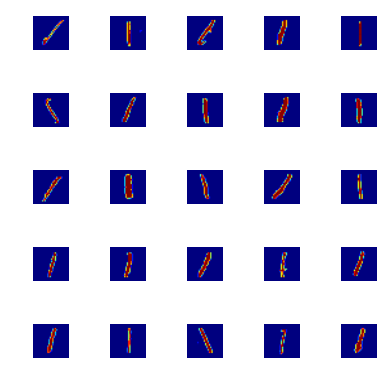

In [73]:
plt.figure(figsize=(4, 4))
n_rows = 5
n_cols = 5

for i in range(n_rows * n_cols):
    plt.subplot(n_rows, n_cols, i+1)
    #plt.imshow(train_set_shuffle.loc[final_25[i]].reshape(28, 28),
     #          interpolation="none", cmap="gray_r")
    plt.imshow(train_set_shuffle.loc[final_25[i]].reshape(28, 28))
    plt.axis("off")
plt.tight_layout()
plt.savefig('top_25.png')
plt.show()

In [74]:
number = 2
train_set_shuffle.to_csv(('experiments/train_set_shuffle_'+str(number)+'.csv'))
train_labels_shuffle.to_csv(('/experiments/train_labels_shuffle_1'+str(number)+'.csv'))
pd.DataFrame(reconstruction).to_csv('/experiments/reconstruction_1'+str(number)+'.csv'))
pd.DataFrame(compression).to_csv('/experiments/compression_1'+str(number)+'.csv'))

SyntaxError: invalid syntax (<ipython-input-74-889c501374dc>, line 4)